In [29]:
import torch
import matplotlib.pyplot as plt

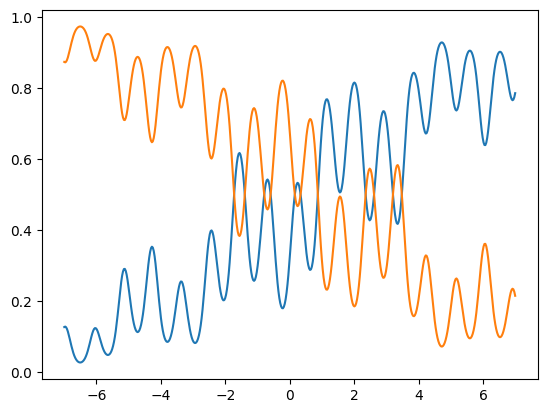

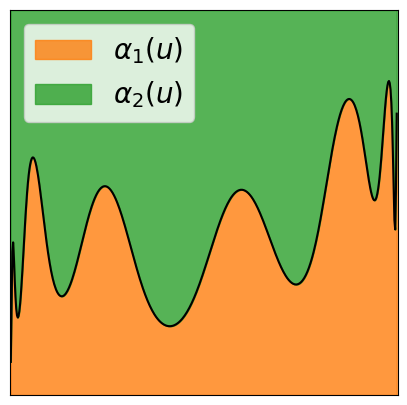

In [46]:
sin = lambda z : z/3 + 0.75*torch.sin(z*7)+ torch.sin(z)**2 - .250
w  = lambda z: torch.softmax(torch.cat([sin(z).unsqueeze(-1), 0.5*torch.ones_like(sin(z)).unsqueeze(-1)], dim = -1), dim = -1)
plt.plot(tt,w(tt)[:,0])
plt.plot(tt,w(tt)[:,1])
base = torch.distributions.Normal(0,1)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.tick_params(labelbottom = False, labelleft = False, bottom = False, left = False) 
alpha = lambda u: w(base.icdf(u))
tt_alpha =torch.linspace(0,1,500)
plt.plot(tt_alpha, alpha(tt_alpha)[:,0], color = 'black')
plt.fill_between(tt_alpha, torch.zeros_like(tt_alpha),alpha(tt_alpha)[:,0], color = 'C1', alpha = .8, label = r'$\alpha_1(u)$')
plt.fill_between(tt_alpha, alpha(tt_alpha)[:,0],torch.ones_like(tt_alpha), color = 'C2', alpha =.8,label = r'$\alpha_2(u)$')
plt.legend(fontsize = 20)

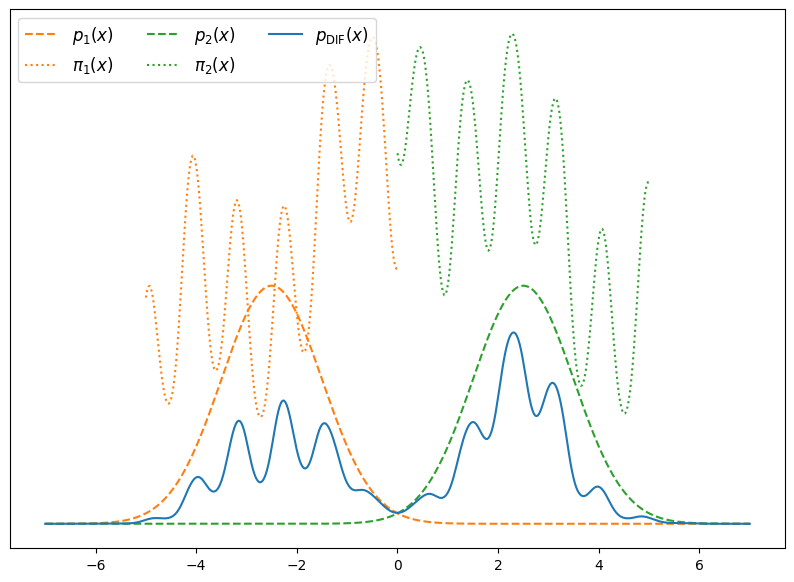

In [47]:
pi_1 = lambda x: w(x-2.5)
pi_0 = lambda x: w(x+2.5)
tt = torch.linspace(-7,7,500)

plt.figure(figsize = (10,7))
ax = plt.subplot(111)
ax.tick_params(left=False,bottom=True,labelleft=False,labelbottom=True)
gauss0 = torch.distributions.MultivariateNormal(torch.tensor([-2.5]), torch.eye(1))
gauss1 = torch.distributions.MultivariateNormal(torch.tensor([2.5]), torch.eye(1))
ax.plot(tt, torch.exp(gauss0.log_prob(tt.unsqueeze(-1))), color = 'C1', linestyle = '--',label = r'$p_1(x)$')
tt0 = torch.linspace(-5, 0, 200)
ax.plot(tt0, pi_0(tt0)[:,0], color = 'C1', linestyle = 'dotted', label =  r'$\pi_1(x)$')
ax.plot(tt, torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C2', linestyle = '--', label = r'$p_2(x)$')
tt1 = torch.linspace(0,5, 200)
ax.plot(tt1, pi_1(tt1)[:,1], color = 'C2', linestyle = 'dotted', label = r'$\pi_2(x)$')
ax.plot(tt,pi_0(tt)[:,0]*torch.exp(gauss0.log_prob(tt.unsqueeze(-1))) + pi_1(tt)[:,1]*torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C0', label = r'$p_{\rm{DIF}}(x)$')
plt.legend(ncol = 3, fontsize = 12)

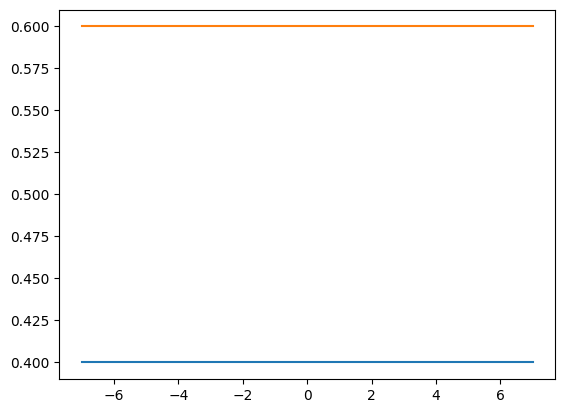

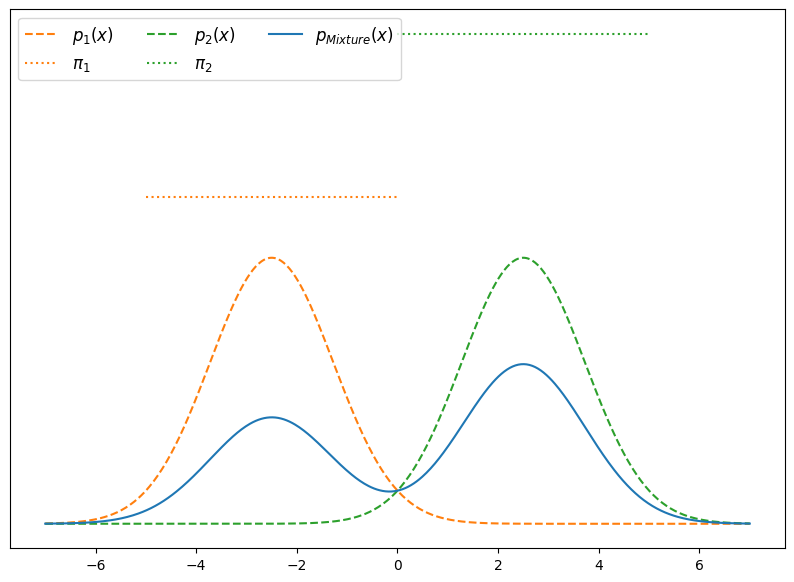

In [33]:
w  = lambda z: torch.tensor([0.4,0.6]).repeat(z.shape[0],1)
plt.plot(tt,w(tt)[:,0])
plt.plot(tt,w(tt)[:,1])
plt.figure(figsize = (10,7))
ax = plt.subplot(111)
ax.tick_params(left=False,bottom=True,labelleft=False,labelbottom=True)
gauss0 = torch.distributions.MultivariateNormal(torch.tensor([-2.5]), 1.5*torch.eye(1))
gauss1 = torch.distributions.MultivariateNormal(torch.tensor([2.5]), 1.5*torch.eye(1))
ax.plot(tt, torch.exp(gauss0.log_prob(tt.unsqueeze(-1))), color = 'C1', linestyle = '--',label = r'$p_1(x)$')
tt0 = torch.linspace(-5, 0, 200)
ax.plot(tt0, w(tt0 + 4.5)[:,0], color = 'C1', linestyle = 'dotted', label =  r'$\pi_1$')
ax.plot(tt, torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C2', linestyle = '--', label = r'$p_2(x)$')
tt1 = torch.linspace(0,5, 200)
ax.plot(tt1, w(tt1 - 4.5)[:,1], color = 'C2', linestyle = 'dotted', label = r'$\pi_2$')
ax.plot(tt,w(tt + 4.5)[:,0]*torch.exp(gauss0.log_prob(tt.unsqueeze(-1))) + w(tt-4.5)[:,1]*torch.exp(gauss1.log_prob(tt.unsqueeze(-1))), color = 'C0', label = r'$p_{Mixture}(x)$')
plt.legend(ncol = 3, fontsize = 12)